In [35]:
pip install keras tensorflow

In [2]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [36]:
import tensorflow as tf

x = tf.Variable(5.0)  # Trainable variable

with tf.GradientTape() as tape:
    fy = x ** 2  # y = x^2

grad = tape.gradient(fy, x)  # Computes dy/dx automatically
print(grad.numpy())  # Output: 10.0

10.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
pip install Pillow

In [7]:
!unzip "/content/drive/MyDrive/AI and ML/week4/Copy of Copy of devnagari digit.zip" -d "/content/drive/MyDrive/AI and ML/week4"


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: /content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: /content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: /content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: /content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: /content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: /content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: /content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: /content/drive/MyDrive/AI and ML/week4/D

In [9]:
!ls "/content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Test"

digit_0  digit_1  digit_2  digit_3  digit_4  digit_5  digit_6  digit_7	digit_8  digit_9


In [10]:
!ls "/content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train/digit_0"


103265.png  12335.png  28867.png  39442.png  4575.png	49273.png  6783.png   76339.png  9506.png
103266.png  12336.png  28868.png  39443.png  4576.png	49274.png  6784.png   76340.png  9507.png
103267.png  12337.png  28870.png  39444.png  4577.png	49275.png  6785.png   76341.png  9508.png
103268.png  12338.png  28873.png  39446.png  4578.png	49277.png  6786.png   76342.png  9509.png
103269.png  12339.png  28874.png  39447.png  4579.png	49278.png  6787.png   76343.png  9510.png
103270.png  12340.png  28876.png  39448.png  4580.png	49279.png  6788.png   76344.png  9511.png
103271.png  12341.png  28877.png  39449.png  4581.png	49280.png  6789.png   76345.png  9512.png
103272.png  12342.png  28878.png  39450.png  4582.png	49281.png  6790.png   76346.png  9513.png
103273.png  12343.png  28879.png  39451.png  4583.png	49282.png  6791.png   76347.png  9514.png
103274.png  12344.png  28880.png  39452.png  4585.png	49283.png  6792.png   76348.png  9515.png
103275.png  12345.png  28882.png  39453.

In [11]:
from PIL import Image
import os
import numpy as np

# Path to the dataset folder
dataset_path = "/content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train"

# Placeholder for images and labels
images = []
labels = []

# Iterate through each folder and file
for label_folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, label_folder)
    if os.path.isdir(folder_path):  # Ensure it’s a directory
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if file_name.endswith('.png'):  # Assuming images are PNG files
                # Open and process image
                image = Image.open(file_path).convert('L')  # Convert to grayscale
                image_array = np.array(image)  # Convert to numpy array
                images.append(image_array)
                labels.append(label_folder)  # Use folder name as label

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images with labels.")


Loaded 17000 images with labels.


In [12]:
from PIL import Image
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

# Function to load, process, and normalize images
def load_images_and_labels(folder_path, target_size=(28, 28)):
    images = []
    labels = []
    label_mapping = {}  # To map folder names to numerical labels
    current_label = 0

    # Iterate through folders (each folder represents a class)
    for label_folder in sorted(os.listdir(folder_path)):  # Ensure consistent label order
        label_path = os.path.join(folder_path, label_folder)
        if os.path.isdir(label_path):
            # Map folder name to a numerical label
            if label_folder not in label_mapping:
                label_mapping[label_folder] = current_label
                current_label += 1

            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                if file_name.endswith('.png'):  # Check for PNG files
                    # Load image, resize to target size, and convert to grayscale
                    image = Image.open(file_path).convert('L').resize(target_size)
                    image_array = np.array(image, dtype=np.float32)  # Convert to NumPy array
                    image_array /= 255.0  # Normalize to range 0-1
                    images.append(image_array)
                    labels.append(label_mapping[label_folder])  # Assign numerical label

    # Convert to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_mapping

# Paths to the train and test folders
train_folder = "/content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Train"
test_folder = "/content/drive/MyDrive/AI and ML/week4/DevanagariHandwrittenDigitDataset/Test"

# Load and process training and testing data
train_images, train_labels, label_mapping = load_images_and_labels(train_folder)
test_images, test_labels, _ = load_images_and_labels(test_folder)

# ✅ Shuffle after loading!
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

# One-hot encode the labels for multi-class classification
train_labels = to_categorical(train_labels, num_classes=len(label_mapping))
test_labels = to_categorical(test_labels, num_classes=len(label_mapping))

# Confirm everything looks good
print(f"Training set: {train_images.shape[0]} images, {train_labels.shape[0]} labels.")
print(f"Testing set: {test_images.shape[0]} images, {test_labels.shape[0]} labels.")
print(f"Label Mapping: {label_mapping}")
print(os.listdir(train_folder))


Training set: 17000 images, 17000 labels.
Testing set: 3000 images, 3000 labels.
Label Mapping: {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


Task 2: Build the FCN Model
Model Architecture
• Create a Sequential model using Keras.
• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a
softmax activation function.

In [13]:
from tensorflow.keras.models import Sequential

# Initialize the Sequential model
model = Sequential()

print("Sequential model initialized.")


Sequential model initialized.


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense  # Import necessary layers

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the input
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for classification

model.summary()  # Print model architecture

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

.


.


Task 3: Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [44]:
from tensorflow.keras.optimizers import Adam

# Compile the previously built model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


print("Model compiled successfully.")


Model compiled successfully.


In [45]:
print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of train_labels: {train_labels.shape}")


Shape of train_images: (17000, 28, 28)
Shape of train_labels: (17000, 10)


Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set up callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
callbacks = [checkpoint, early_stopping]

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model before training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming train_images and train_labels are already defined
history = model.fit(
    train_images, train_labels,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks  # Use the callbacks list here
)

# Print model summary
print(model.summary())

Epoch 1/20
105/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6763 - loss: 1.0685

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6806 - loss: 1.0544 - val_accuracy: 0.9297 - val_loss: 0.2134
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9506 - loss: 0.1662

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9507 - loss: 0.1661 - val_accuracy: 0.9538 - val_loss: 0.1481
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9645 - loss: 0.1179

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9645 - loss: 0.1178 - val_accuracy: 0.9671 - val_loss: 0.1022
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9803 - loss: 0.0726 - val_accuracy: 0.9721 - val_loss: 0.1039
Epoch 5/20
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9845 - loss: 0.0596

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9845 - loss: 0.0595 - val_accuracy: 0.9700 - val_loss: 0.0891
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9856 - loss: 0.0465

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.9750 - val_loss: 0.0797
Epoch 7/20
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9912 - loss: 0.0334

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9912 - loss: 0.0333 - val_accuracy: 0.9791 - val_loss: 0.0728
Epoch 8/20
103/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9926 - loss: 0.0276

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9926 - loss: 0.0275 - val_accuracy: 0.9815 - val_loss: 0.0638
Epoch 9/20
101/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9982 - loss: 0.0124

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9981 - loss: 0.0126 - val_accuracy: 0.9829 - val_loss: 0.0593
Epoch 10/20
104/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9947 - loss: 0.0194

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9948 - loss: 0.0193 - val_accuracy: 0.9818 - val_loss: 0.0537
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9987 - loss: 0.0080 - val_accuracy: 0.9815 - val_loss: 0.0633
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9983 - loss: 0.0083 - val_accuracy: 0.9806 - val_loss: 0.0691
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9794 - val_loss: 0.0676


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,464 (1.08 MB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 188,310 (735.59 KB)

None


In [49]:
test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


532/532 - 1s - 2ms/step - accuracy: 0.9943 - loss: 0.0228
Test accuracy: 0.9943


In [50]:
# Save model as .h5 file
model.save("devanagari_model.h5")
print("Model saved as devanagari_model.h5")


Model saved as devanagari_model.h5


In [51]:
from tensorflow.keras.models import load_model

# Load the .h5 model
model = load_model("devanagari_model.h5")
print("Model loaded from devanagari_model.h5")

Model loaded from devanagari_model.h5


In [52]:
# Use the model to make predictions on the test set
predictions = model.predict(train_images)

# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(train_labels[0])}")

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 6
True label for first image: 6


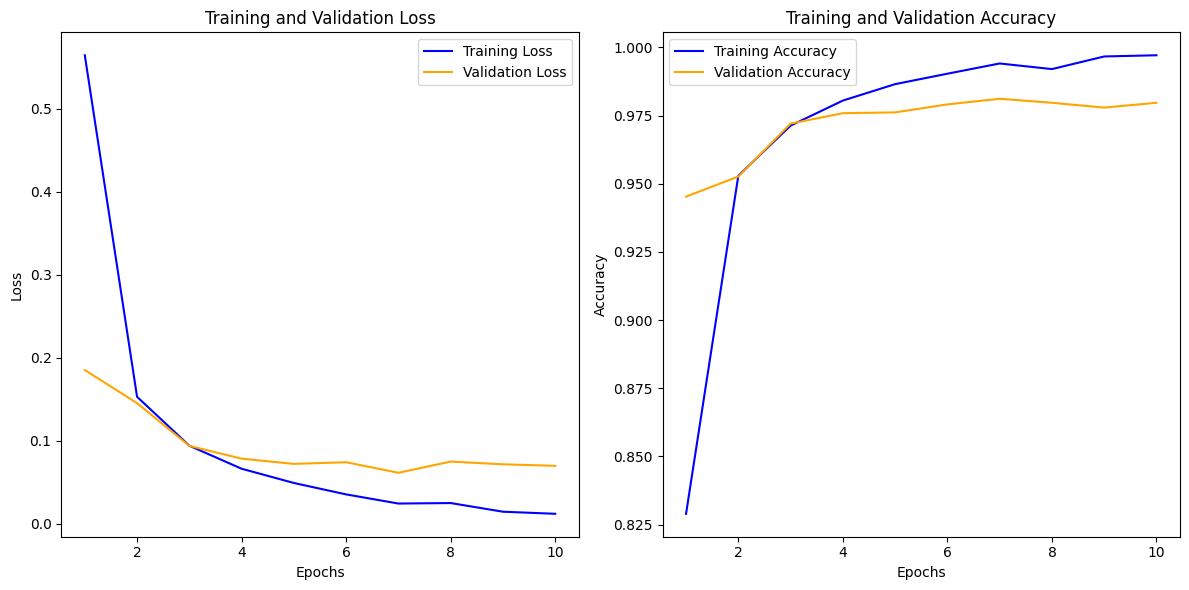

In [53]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()